In [1]:
# Imports:
import numpy as np
from tabulate import tabulate
import matplotlib.pyplot as plt

In [2]:
# Function from the lab exercise:
def f(x,y):
    x_d = x - x*y
    y_d = x*y - y

    return x_d, y_d

In [3]:
#Euler Method iterativly. Steps is N, if taken N steps, than we return.
def Euler_method(func,xn,yn,h,steps):
    return_x = [xn]
    return_y = [yn]

    x_next = xn
    y_next = yn


    for i in range(0,steps):    
        mx,my = func(x_next,y_next)
        
        x_next = return_x[-1] + h * mx
        y_next = return_y[-1] + h * my
        
        return_x.append(x_next)
        return_y.append(y_next)

    return return_x, return_y

        

In [4]:
# Inputs for the solvers:
T = 50
x0 = 5
y0 = 1

N = 1000

h = T/N

x_euler,y_euler = Euler_method(f,x0,y0,h,N)

print('Euler Method soultion:')
for x, y in zip(x_euler, y_euler):
    print(x, y)


Euler Method soultion:
5 1
5.0 1.2
4.95 1.44
4.8411 1.7244
4.665755358 2.055579642
4.419501539477139 2.4323422463228614
4.102989601343038 2.848212149114677
3.723829839898368 3.290110783170764
3.2974306963461526 3.7381958795593597
2.8459801390527733 4.167608177692078
2.395232640952133 4.552274273860753
1.9698064764338425 4.869848356733613
1.588663858638306 5.105988880514161
1.2625120517161257 5.256274436342549
0.9938321631514393 5.325266205675915
0.7789027296818036 5.323623937019327
0.6105186053487066 5.264772000985547
0.48033247264011114 5.162245463912301
0.380369389869307 5.028112897119495
0.3037608476192056 4.872334264007088
0.2449476707042213 4.702718770102678
0.19959905380374882 4.525178832033228
0.164417935835607 4.344080961089896
0.1369265913911293 4.162589154271659
0.11527446374788067 3.9829581537708814
0.09808151866996534 3.8067669143476466
0.08431692059437385 3.635097242639354
0.07320775634607005 3.468667390785409
0.06417147630386472 3.307930689105647
0.056766310327519456 3.15

In [5]:
def Crank_Nicolson(func,x0,y0,h):
    
    # f(tn+1,yn+1) is estimated with Euler method
    x1,y1 = Euler_method(func,x0,y0,h,1)
    x1 = x1[1]
    y1 = y1[1]
    
    mx_curr, my_curr = func(x0,y0)
    mx,my = func(x1,y1)

    x_next = x0 + 0.5 * h * mx_curr + 0.5 * h * mx
    y_next = y0 + 0.5 * h * my_curr + 0.5 * h * my
    
    return x_next,y_next

In [6]:
def Adams_Bashford(func,h,steps,return_x,return_y):
    
    for _ in range(0,steps):    
            
        mx_curr, my_curr = func(return_x[-2],return_y[-2])
        mx,my = func(return_x[-1],return_y[-1])

        x_n2 = return_x[-1] + h * (3/2 * mx - 1/2 * mx_curr)
        y_n2 = return_y[-1] + h * (3/2 * my - 1/2 * my_curr)

        return_x.append(x_n2)
        return_y.append(y_n2)
        
    return return_x, return_y

In [7]:
# Inputs for the solvers:
T = 50
x0 = 5
y0 = 1

N = 1000

h = T/N

# (x1 and y1 is calculated with Crank_Nicolson())
x1,y1 = Crank_Nicolson(f,x0,y0,h)
x_adams,y_adams = Adams_Bashford(f,h,N,[x0,x1],[y0,y1])

print('Adams - Bashford Method solution:')
for x, y in zip(x_adams,y_adams):
    print(x, y)



Adams Bashford Method solution:
5 1
4.975 1.2200000000000002
4.8929124999999996 1.4837125000000002
4.742767779675781 1.795672220324219
4.518910210386927 2.1553319565644395
4.221689321512446 2.5561438254918185
3.859493673073854 2.984165929786395
3.4493918784188153 3.4182786677874772
3.0152194649958277 3.8329013784256287
2.5831227815081323 4.202894088140305
2.1761581145367237 4.508817954950046
1.810314131800295 4.74020673232128
1.4933865156745263 4.895708899418308
1.2263253078050804 4.9808432435199945
1.0056346250946868 5.005003140645364
0.8256121081045769 4.978935967362046
0.6799220254987077 4.913110973412373
0.5625026928710983 4.816874231427894
0.4679927988325553 4.698135983772519
0.3918652739575862 4.5633620582409105
0.33040596050811516 4.417712692492631
0.2806224583693959 4.2652356093395944
0.24013089120337833 4.10906385848246
0.20704468166366202 3.9515954242505003
0.17987582841626223 3.7946462959858644
0.15745193297004167 3.6395761749290356
0.13884868808824566 3.487389363353147
0.12

Exercise 1 c)

In [8]:
N = 10**7

h = T/N

# Euler Solution:
x_euler,y_euler = Euler_method(f,x0,y0,h,N)

# 2-step Adams-Bashford solution:
x1,y1 = Crank_Nicolson(f,x0,y0,h)
x_adams,y_adams = Adams_Bashford(f,h,N,[x0,x1],[y0,y1])

# Exact Euler:
exact_euler = x_euler[-1] + y_euler[-1]
exact_adams = x_adams[-1] + y_adams[-1]


# These are for exercise d)
exact_euler_whole = x_euler + y_euler
exact_adams_whole = x_adams + y_adams



In [9]:
print('exact_euler:')
print(exact_euler)
print('exact_adams:')
print(exact_adams)

exact_euler:
0.26483742671459043
exact_adams:
0.26504127957325124


Determine the rate of convargence:

In [10]:
# Squared Error between the exact and current solution:
def Errornorm(exact, current):
    e = np.sqrt(abs(exact**2 - current**2))
    
    return e

In [11]:
# This is where I calculate the convergence rate
# and the error for Euler. The method is implemented the same as in
# the previous lab.
N = []

for i in range(0,9):
    N.append(2**(10+i))


rates = np.zeros(len(N))
errors = np.zeros(len(N))
solutions = np.zeros(len(N))

for i in range(0,len(N)):
    h = T/N[i]
    
    x_euler,y_euler = Euler_method(f,x0,y0,h,N[i])
    solutions[i] = x_euler[-1] + y_euler[-1]
    

for j in range(1,len(N)):
    
    current_solution =  solutions[j-1]
    next_solution =  solutions[j]
    
    dif_2h  = Errornorm(exact_euler,current_solution) 
    
    dif_h = Errornorm(exact_euler,next_solution)
    
    r = np.log2(dif_2h/dif_h)
    

    errors[j] = dif_h
    rates[j] = r

errors[0] = Errornorm(exact_euler,solutions[0])

print(tabulate([['errors', errors[0], errors[1],errors[2],errors[3],errors[4],errors[5],errors[6],errors[7],errors[8]], ['rates', 'No Rate', rates[1],rates[2],rates[3],rates[4],rates[5],rates[6],rates[7],rates[8]]], headers= ['N',N[0], N[1],N[2],N[3],N[4],N[5],N[6],N[7],N[8]],tablefmt="grid"))


+--------+--------------------+-----------+----------+----------+-----------+-----------+----------+-----------+-----------+
| N      | 1024               |      2048 |     4096 |     8192 |     16384 |     32768 |    65536 |    131072 |    262144 |
+========+====================+===========+==========+==========+===========+===========+==========+===========+===========+
| errors | 0.2647859622096912 | 0.261467  |  6.09739 | 0.512312 | 0.0123922 |  0.123543 | 0.107657 | 0.0829062 | 0.0607382 |
+--------+--------------------+-----------+----------+----------+-----------+-----------+----------+-----------+-----------+
| rates  | No Rate            | 0.0181961 | -4.54349 | 3.5731   | 5.36952   | -3.31751  | 0.198578 | 0.376888  | 0.448877  |
+--------+--------------------+-----------+----------+----------+-----------+-----------+----------+-----------+-----------+


In [12]:
# ----------------------------------------------
# Here I write the same for Adams - Bashford:
# ----------------------------------------------

# This is where I calculate the convergence rate
# and the error for Adams - Bashford. The method is implemented the same as in
# the previous lab.


rates = np.zeros(len(N))
errors = np.zeros(len(N))
solutions = np.zeros(len(N))

for i in range(0,len(N)):
    h = T/N[i]

    x1,y1 = Crank_Nicolson(f,x0,y0,h)
    x_adams,y_adams = Adams_Bashford(f,h,N[i],[x0,x1],[y0,y1])

    solutions[i] = x_adams[-1] + y_adams[-1]
    

for j in range(1,len(N)):
    
    current_solution =  solutions[j-1]
    next_solution =  solutions[j]
    
    dif_2h  = Errornorm(exact_adams,current_solution) 
    
    dif_h = Errornorm(exact_adams,next_solution)
    
    r = np.log2(dif_2h/dif_h)

    errors[j] = dif_h
    rates[j] = r

errors[0] = Errornorm(exact_adams,solutions[0])

print(tabulate([['errors', errors[0], errors[1],errors[2],errors[3],errors[4],errors[5],errors[6],errors[7],errors[8]], ['rates', 'No Rate', rates[1],rates[2],rates[3],rates[4],rates[5],rates[6],rates[7],rates[8]]], headers= ['N',N[0], N[1],N[2],N[3],N[4],N[5],N[6],N[7],N[8]],tablefmt="grid"))

+--------+--------------------+-----------+-----------+-----------+-----------+------------+-----------+-----------+------------+
| N      | 1024               |      2048 |      4096 |      8192 |     16384 |      32768 |     65536 |    131072 |     262144 |
+========+====================+===========+===========+===========+===========+============+===========+===========+============+
| errors | 0.1997387024383141 | 0.0796422 | 0.0396623 | 0.0221548 | 0.0134407 | 0.00866292 | 0.0058089 | 0.0039832 | 0.00275837 |
+--------+--------------------+-----------+-----------+-----------+-----------+------------+-----------+-----------+------------+
| rates  | No Rate            | 1.32651   | 1.00576   | 0.840147  | 0.721018  | 0.633677   | 0.57659   | 0.544336  | 0.530113   |
+--------+--------------------+-----------+-----------+-----------+-----------+------------+-----------+-----------+------------+


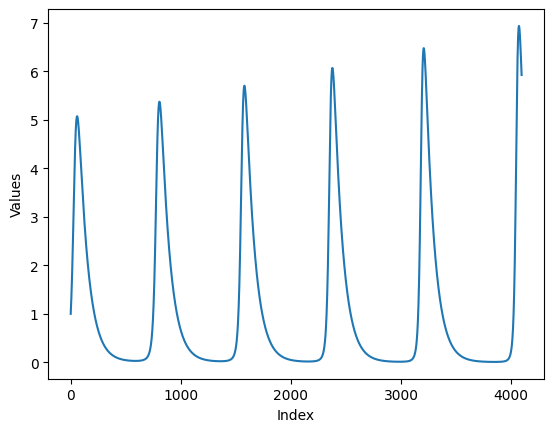

In [13]:
# This is an example for the bad error and convergence rate values I get.
# As Euler is periodic, it had one peak where the last element of N = 2*12 calculation was.
# That is why it shows bigger errors and bad rates at N = 2*12.
# The plot cuts off at a peak.

import matplotlib.pyplot as plt

# Inputs for the solvers:
T = 50
x0 = 5
y0 = 1

N = 2**12

h = T/N

x_euler,y_euler = Euler_method(f,x0,y0,h,N)



plt.plot(y_euler)
plt.xlabel('Index')
plt.ylabel('Values')

plt.show()


Exercise 1 d)

In [14]:
from scipy.signal import find_peaks
peaks, _ = find_peaks(exact_euler_whole, height=0)



# For minimums:
# ChatGPT help
min_peaks = []
min_peaks_values = []

for i in range(1, len(exact_euler_whole) - 1):
    if exact_euler_whole[i] < exact_euler_whole[i - 1] and exact_euler_whole[i] < exact_euler_whole[i + 1]:
        min_peaks.append(i)
        min_peaks_values.append(exact_euler_whole[i])


In [15]:
peaks_values = []


for i in range(0,len(peaks)):
    peaks_values.append(exact_euler_whole[peaks[i]])



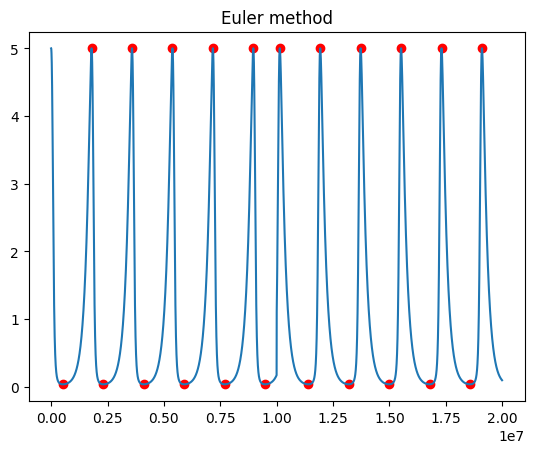

In [16]:

plt.plot(exact_euler_whole)
plt.scatter(peaks, peaks_values, color = 'red')
plt.scatter(min_peaks, min_peaks_values, color = 'red')
plt.title('Euler method')
plt.show()

Same plot for Adams - Bashford:

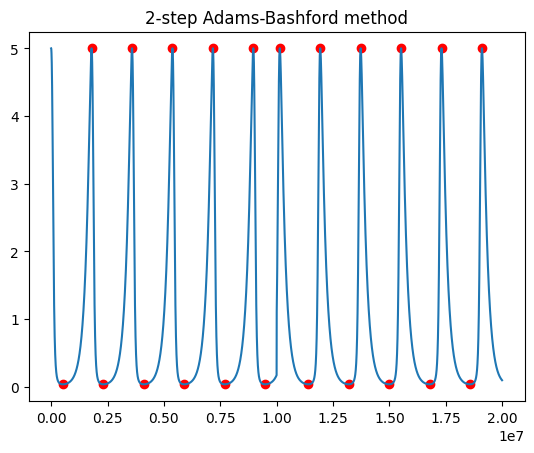

In [17]:
peaks, _ = find_peaks(exact_euler_whole, height=0)

min_peaks = []
min_peaks_values = []
peaks_values = []

for i in range(1, len(exact_euler_whole) - 1):
    if exact_euler_whole[i] < exact_euler_whole[i - 1] and exact_euler_whole[i] < exact_euler_whole[i + 1]:
        min_peaks.append(i)
        min_peaks_values.append(exact_euler_whole[i])

for i in range(0,len(peaks)):
    peaks_values.append(exact_euler_whole[peaks[i]])

plt.plot(exact_euler_whole)
plt.scatter(peaks, peaks_values, color = 'red')
plt.scatter(min_peaks, min_peaks_values, color = 'red')
plt.title('2-step Adams-Bashford method')
plt.show()